In [7]:
import sys
import numpy as np
import sklearn as sk
import pandas as pd
import scipy
import matplotlib as plt
#from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
# Check Python Version
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.5 (default, Oct 31 2019, 15:18:51) [MSC v.1916 64 bit (AMD64)]
scipy: 1.3.1
numpy: 1.17.4
matplotlib: 3.1.1
pandas: 0.25.3
sklearn: 0.21.3


[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
clump_thickness            5
uniform_cell_size          4
uniform_cell_shape         4
marginal_adhesion          5
single_epithelial_size     7
bare_nuclei               10
bland_chromatin            3
normal_nucleoli            2
mitoses                    1
class                      2
Name: 1, dtype: object
(699, 10)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E0BB019FC8>,
      dtype=object)

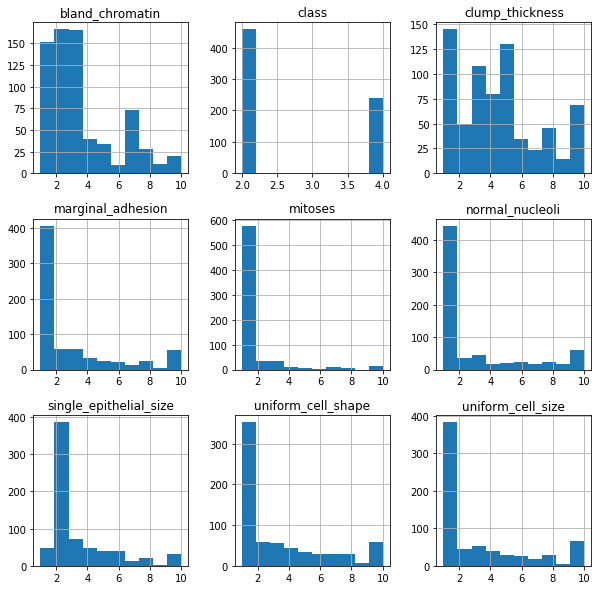

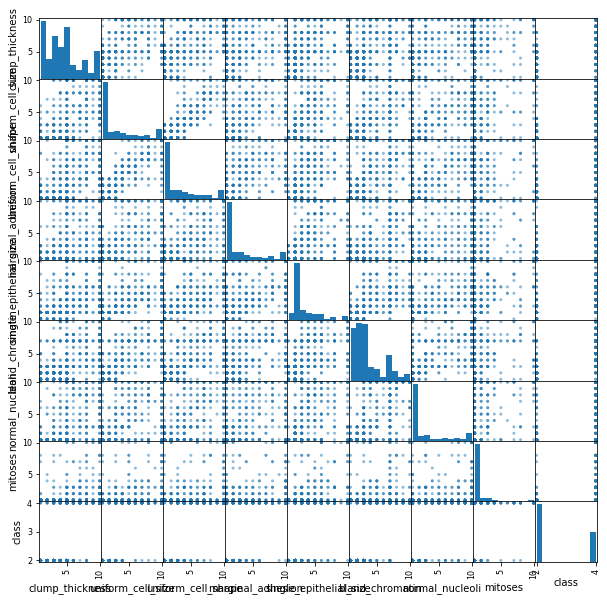

In [8]:
#loading data
url= "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names=['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df= pd.read_csv(url,names=names)

#pre process the data
df.replace('?',-99999,inplace=True)
print(df.axes)
df.drop(['id'],1,inplace=True)

# Explore and visualize the data

print (df.loc[1])
print (df.shape)
df.hist(figsize=(10,10))

pd.plotting.scatter_matrix(df,figsize=(10,10))


In [11]:
# create varibales from data for model
X=np.array(df.drop(['class'],1))
y=np.array(df['class'])

X_train,X_test, y_train,y_test= sk.model_selection.train_test_split(X,y,test_size=0.25)


In [12]:
#define models
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM', SVC()))

results=[]
names= []
for name,model in models:
    kfold= model_selection.KFold(n_splits=10,random_state=8)
    cv_results=model_selection.cross_val_score(model,X_train,y_train, cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg= "%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())
    print(msg)

KNN: 0.969448 (0.015369)
SVM: 0.955951 (0.031126)


C:\Users\bipatel\AppData\Local\Continuum\anaconda3\envs\MyEnv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bipatel\AppData\Local\Continuum\anaconda3\envs\MyEnv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bipatel\AppData\Local\Continuum\anaconda3\envs\MyEnv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid

In [13]:
for name,model in models:
    model.fit(X_train,y_train)
    predictions= model.predict(X_test)
    print(name)
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test,predictions))

KNN
0.9771428571428571
              precision    recall  f1-score   support

           2       0.99      0.97      0.98       110
           4       0.96      0.98      0.97        65

    accuracy                           0.98       175
   macro avg       0.97      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175

SVM
0.96
              precision    recall  f1-score   support

           2       1.00      0.94      0.97       110
           4       0.90      1.00      0.95        65

    accuracy                           0.96       175
   macro avg       0.95      0.97      0.96       175
weighted avg       0.96      0.96      0.96       175



C:\Users\bipatel\AppData\Local\Continuum\anaconda3\envs\MyEnv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [14]:
#predict new example

classify= SVC()

classify.fit(X_train,y_train)
accuracy=classify.score(X_test,y_test)
print(accuracy)

ex=np.array([[4,2,4,3,4,3,2,3,3]])
prediction=classify.predict(ex)
print(prediction)

0.96
[4]


C:\Users\bipatel\AppData\Local\Continuum\anaconda3\envs\MyEnv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


IndexError: tuple index out of range

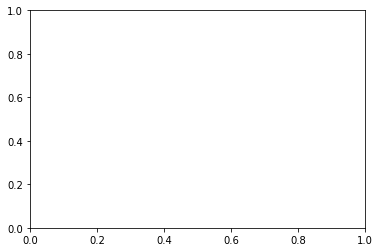

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_train)
pca_2d = pca.transform(X_train)

#ploting feature in 2d
import pylab as pl
#from pylab import rc
for i in range(0, pca_2d.shape[0]):
    #if y_train[i] == 1:
    #    c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c=1,    marker='+')
        
    if y_train[i] == 2:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c=2,    marker='o')
    elif y_train[i] == 4:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c=4,    marker='*')
       
pl.legend([ c2, c3], ['non Malignant', 'Malignant'])
#rc('figure', figsize=(8, 6))
pl.title('Iris training dataset with 2 classes and    known outcomes')
pl.show()




C:\Users\bipatel\AppData\Local\Continuum\anaconda3\envs\MyEnv\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


ValueError: RGBA values should be within 0-1 range

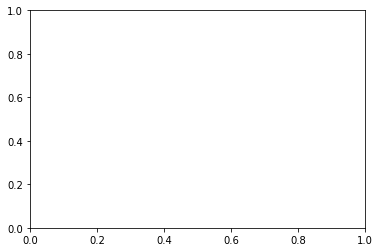

In [17]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn import svm
#from sklearn import cross_validation
import pylab as pl
import numpy as np
iris = load_iris()
#X_train, X_test, y_train, y_test =   cross_validation.train_test_split(iris.data,   iris.target, test_size=0.10, random_state=111)
pca = PCA(n_components=2).fit(X_train)
pca_2d = pca.transform(X_train)
svmClassifier_2d =   svm.LinearSVC(random_state=111).fit(pca_2d, y_train)
for i in range(0, pca_2d.shape[0]):
    if y_train[i] == 2:
     c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='2',    s=50,marker='+')
    elif y_train[i] == 4:
     c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='4',    s=50,marker='o')
#elif y_train[i] == 2:
# c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    s=50,marker='*')
pl.legend([c1, c2], ['Non malignant', 'Malignant'])
x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 1
y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
Z = svmClassifier_2d.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
pl.contour(xx, yy, Z)
pl.title('Support Vector Machine Decision Surface')
pl.axis('off')
pl.show()